In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"

# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
City_and_Ride_Data_Merged = pd.merge(ride_data, city_data, how = "left", on = ["city","city"])

# Display the data table for preview
City_and_Ride_Data_Merged.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

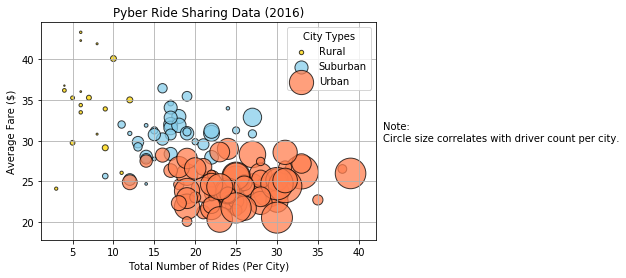

In [7]:
# Obtain the x and y coordinates for each of the three city types

#Create column for Ride Count ("1" in each row, so that we can iterate through the rows and sum the ride counts)
City_and_Ride_Data_Merged["Ride Count"] = 1

#Group by Type and City
grouped_by_city = City_and_Ride_Data_Merged.groupby(["type","city"], as_index = False)

#Add column for Average Fare
summary_by_city = grouped_by_city["Ride Count", "fare","driver_count"].sum()
summary_by_city["Average Fare"] = summary_by_city["fare"]/summary_by_city["Ride Count"] 

#Split DataFrame into Rural, Suburban, and Urban
is_rural = summary_by_city["type"]=="Rural" 
rural_summary = summary_by_city[is_rural]

is_suburban = summary_by_city["type"]=="Suburban" 
suburban_summary = summary_by_city[is_suburban]

is_urban = summary_by_city["type"]=="Urban" 
urban_summary = summary_by_city[is_urban]

# Build the scatter plots for each city types
rural_plot = plt.scatter(
    rural_summary["Ride Count"],
    rural_summary["Average Fare"], 
    s = .5 * rural_summary["driver_count"],
    color = "Gold",
    edgecolor = "Black",
    alpha = .75,
    label = "Rural"
    )

suburban_plot = plt.scatter(
    suburban_summary["Ride Count"],
    suburban_summary["Average Fare"], 
    s = .5 * suburban_summary["driver_count"],
    color = "SkyBlue",
    edgecolor = "Black",
    alpha = .75,
    label = "Suburban"
    )

urban_plot = plt.scatter(
    urban_summary["Ride Count"],
    urban_summary["Average Fare"], 
    s = .5 * urban_summary["driver_count"],
    color = "Coral",
    edgecolor = "Black",
    alpha = .75,
    label = "Urban"
    )

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(title = "City Types")

# Incorporate a text label regarding circle size
text_string = "Note:\nCircle size correlates with driver count per city."
plt.text(43,30,text_string)

# TODO Save Figure 
plt.savefig("2016 Ride Sharing Data - Bubble Plot")
plt.show()

## Total Fares by City Type

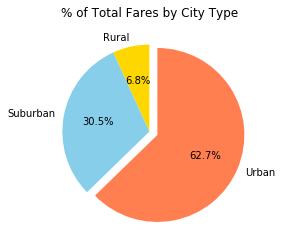

In [8]:
# Calculate Type Percents
x = [rural_summary["fare"].sum(), suburban_summary["fare"].sum(), urban_summary["fare"].sum()]
labels = ["Rural","Suburban","Urban"]
colors = ["Gold","SkyBlue","Coral"]

plt.pie(x, labels = labels, colors = colors, autopct = "%1.1f%%", explode = (0,0,.1), startangle= 90)
plt.title("% of Total Fares by City Type")

# Build Pie Chart

# Save Figure
plt.savefig("Total Fares by City - Pie Plot")
plt.show()

## Total Rides by City Type

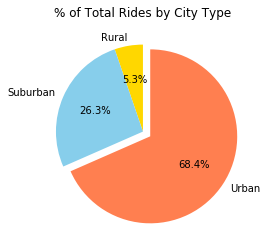

In [9]:
# Calculate Ride Percents
x = [rural_summary["Ride Count"].sum(), suburban_summary["Ride Count"].sum(), urban_summary["Ride Count"].sum()]
# labels = ["Rural","Suburban","Urban"]
# colors = ["Gold","SkyBlue","Coral"]

plt.pie(x, labels = labels, colors = colors, autopct = "%1.1f%%", explode = (0,0,.1), startangle= 90)
plt.title("% of Total Rides by City Type")

# Build Pie Chart

# Save Figure
plt.savefig("Total Rides by City Type - Pie Plot")
plt.show()

## Total Drivers by City Type

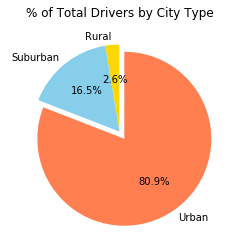

In [10]:
# Calculate Driver Percents
city_data_grouped_by_type = city_data.groupby("type", as_index = False)

city_data_summarized = city_data_grouped_by_type["driver_count"].sum()

is_rural = city_data_summarized["type"]=="Rural" 
rural_summary = city_data_summarized[is_rural]

is_suburban = city_data_summarized["type"]=="Suburban" 
suburban_summary = city_data_summarized[is_suburban]

is_urban = city_data_summarized["type"]=="Urban"
urban_summary = city_data_summarized[is_urban]

x = rural_summary["driver_count"].sum(),suburban_summary["driver_count"].sum(),urban_summary["driver_count"].sum()

plt.pie(x,labels = labels, colors = colors, autopct = "%1.1f%%", explode = (0,0,.1), startangle= 90)
plt.title("% of Total Drivers by City Type")

# Build Pie Charts

# Save Figure
plt.savefig("Total Drivers by City Type - Pie Plot")
plt.show()